# RQ2_PYTHON_CWE_with_high_CVSS
## RQ2:What are the common types of weakness and differences across open source ecosystems.
## 3. CWE with high CVSS

In [1]:
#Importing Libraries
import os
import pandas as pd
import numpy as np
from IPython.display import Markdown as md
import utility as util
import plotly.graph_objects as go  

In [2]:
#import data_set
data = pd.read_csv('../data/python/all.csv',encoding='latin1', low_memory= False)

## 3.1 Top 10 CWEs Python

In [3]:
top10_cwe=data.cwe.groupby(data.cwe).count().sort_values(ascending=False).head(10)
top10_cwe=top10_cwe.to_frame()
top10_cwe.columns=['c']
top10_cwe.reset_index(level=0, inplace=True)
top10_cwe.columns=['cwe','c']

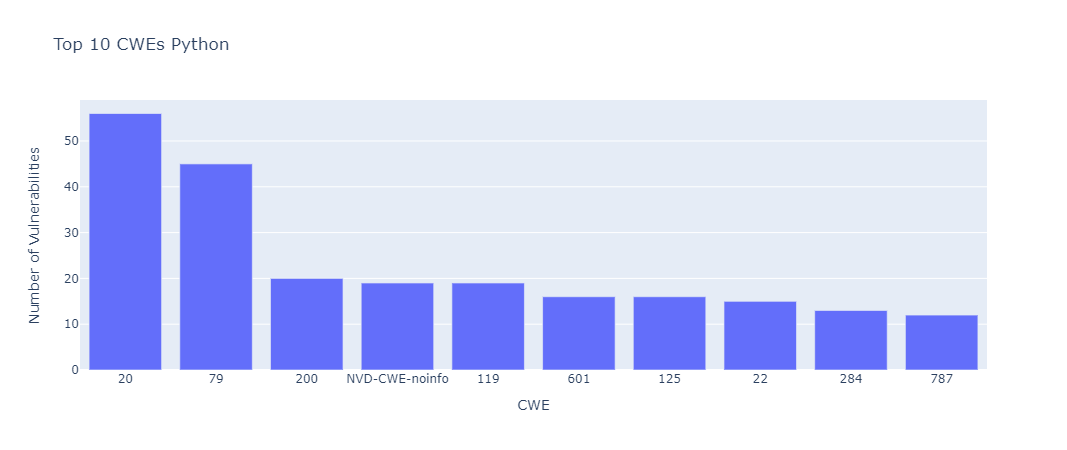

In [22]:
fig = go.Figure()
fig.add_bar(x=top10_cwe["cwe"], y=top10_cwe.c)

fig.update_layout(title='Top 10 CWEs Python',
                  xaxis = dict(title='CWE', type='category'),
                  yaxis = dict(title='Number of Vulnerabilities'))

## 3.2.Top 10 CWEs by name Python

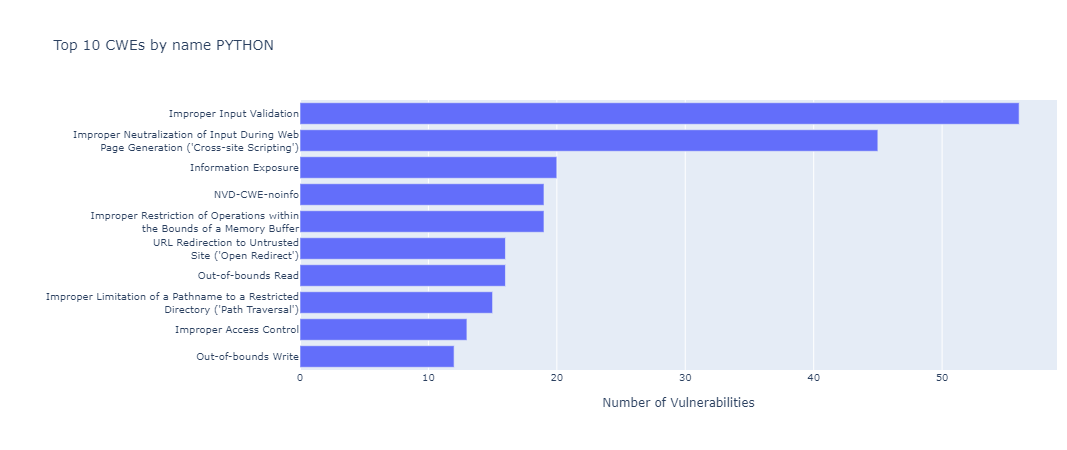

In [23]:
top10_cwe['Name']=top10_cwe['cwe'].map(util.get_name_by_cwe).map(util.wrap)

x = top10_cwe.groupby('Name')['c'].mean().sort_values().head(10)

fig = go.Figure()
fig.add_bar(x=x.values, y=x.index.values, orientation='h')

fig.update_layout(title='Top 10 CWEs by name PYTHON',
                  xaxis = dict(title='Number of Vulnerabilities'),
                  margin = dict(l = 300, r=10),
                  font=dict(size=10))

CWE 264 is whole category rather than a specific weakness:
[CWE CATEGORY: Permissions, Privileges, and Access Controls](https://cwe.mitre.org/data/definitions/264.html)


In [24]:
md('## The top 10 Python CWEs account for the {0:f}% of the vulnerabilities'.format(100*data[data.cwe.isin(top10_cwe.cwe)].count()[0]/(data.count()[0])))

## The top 10 Python CWEs account for the 47.727273% of the vulnerabilities

## 3.3. Top 10 Python packages with the most weaknesses

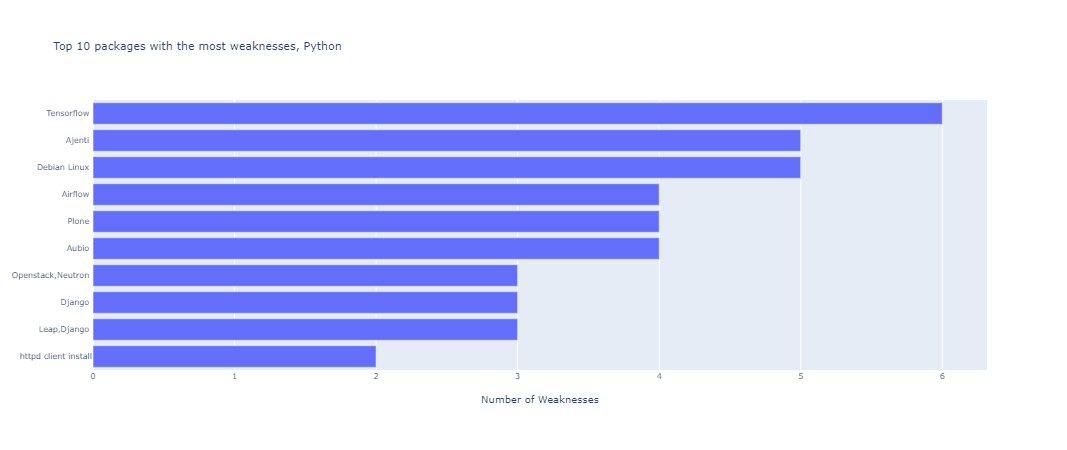

In [25]:
# top 10 products with the most weaknesses
pdata = util.tidy_split(data,column='package_slug',sep=',')
pdata = pdata[pdata['product']!='nan']

y = pdata.groupby('product')['cwe'].count().sort_values().tail(10)

fig = go.Figure()
fig.add_bar(x=y.values, y=y.index.values, orientation='h')

fig.update_layout(title='Top 10 packages with the most weaknesses, Python',
                  xaxis = dict(title='Number of Weaknesses'),
                  font=dict(size=8))

## 3.4. Top 10 products with unique CWEs

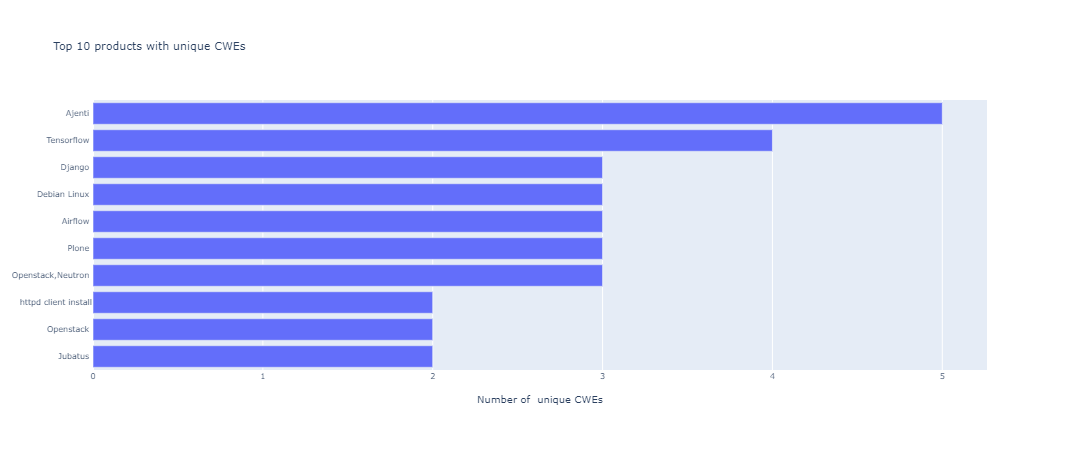

In [8]:
#top unique CWEs per product, i.e. products with the greatest variety of weaknesses
y = pdata.groupby('product')['cwe'].nunique().sort_values().tail(10)

fig = go.Figure()
fig.add_bar(x=y.values, y=y.index.values, orientation='h')

fig.update_layout(title='Top 10 products with unique CWEs',
                  xaxis = dict(title='Number of  unique CWEs'),
                  font=dict(size=8))

## 3.5. Top unique CWEs per vendor

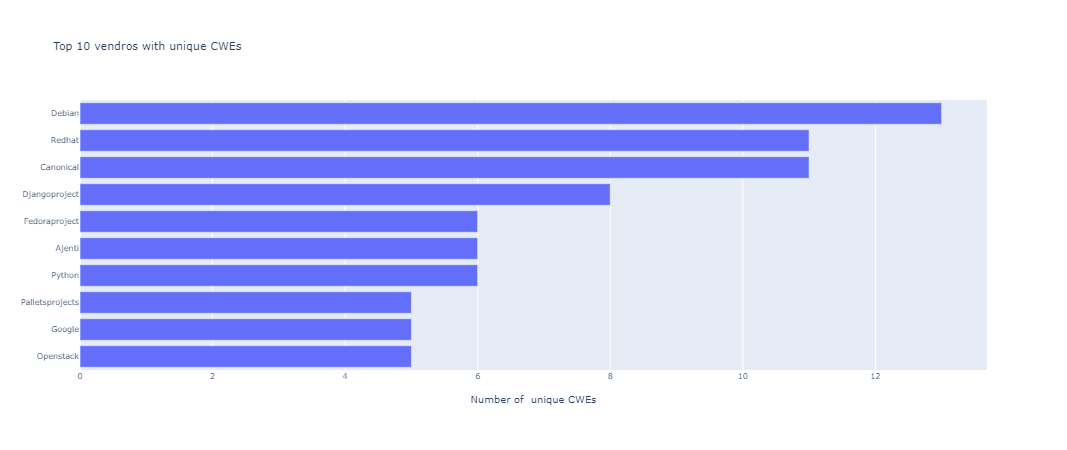

In [9]:
#top unique CWEs per vendor

n=10  # adjust for top n 

vdata = util.tidy_split(data,column='vendor',sep=',')
vdata = vdata[vdata.vendor!='nan']

y = vdata.groupby('vendor')['cwe'].nunique().sort_values().tail(n)

fig = go.Figure()
fig.add_bar(x=y.values, y=y.index.values, orientation='h')

fig.update_layout(title='Top {0:d} vendros with unique CWEs'.format(n),
                  xaxis = dict(title='Number of  unique CWEs'),
                  font=dict(size=8))

### A list of CWEs for some specific vendors...

C:\Users\ngruffer\AppData\Roaming\Python\Python38\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



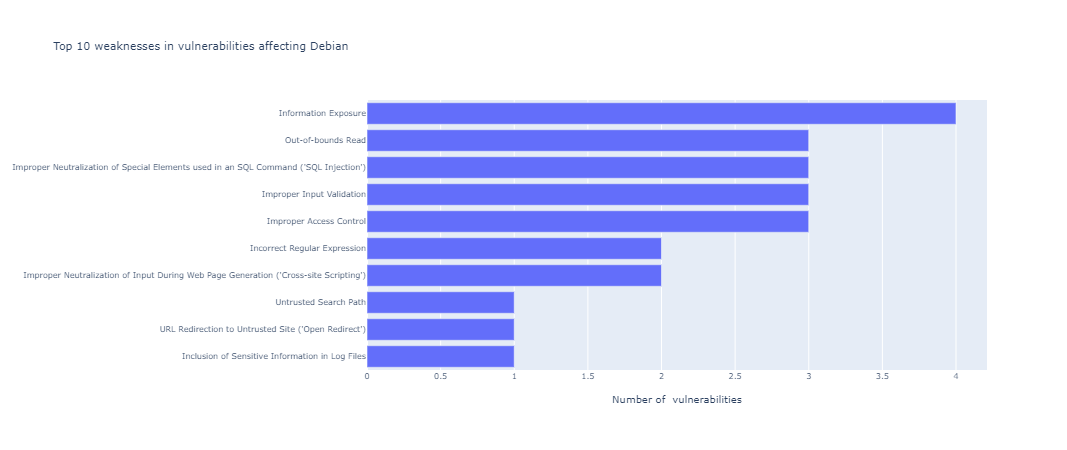

In [10]:
cwe_v = util.get_cwes_by_vendor(vdata, 'Debian')
y = cwe_v['count']
fig = go.Figure()
fig.add_bar(x=y.values, y=y.index.values, orientation='h')

fig.update_layout(title='Top {0:d} weaknesses in vulnerabilities affecting Debian'.format(n),
                  xaxis = dict(title='Number of  vulnerabilities'),
                  font=dict(size=8))

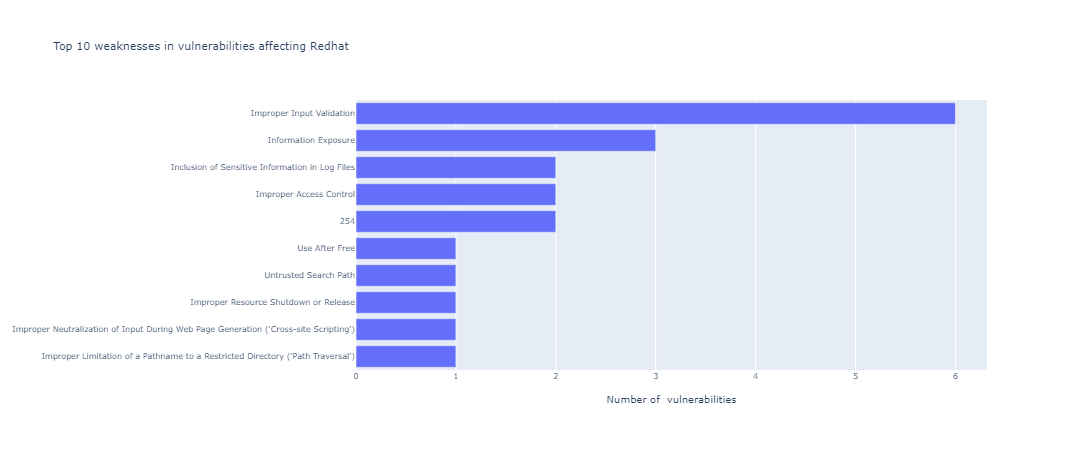

In [11]:
cwe_v = util.get_cwes_by_vendor(vdata, 'Redhat')
y = cwe_v['count']
fig = go.Figure()
fig.add_bar(x=y.values, y=y.index.values, orientation='h')

fig.update_layout(title='Top {0:d} weaknesses in vulnerabilities affecting Redhat'.format(n),
                  xaxis = dict(title='Number of  vulnerabilities'),
                  font=dict(size=8))

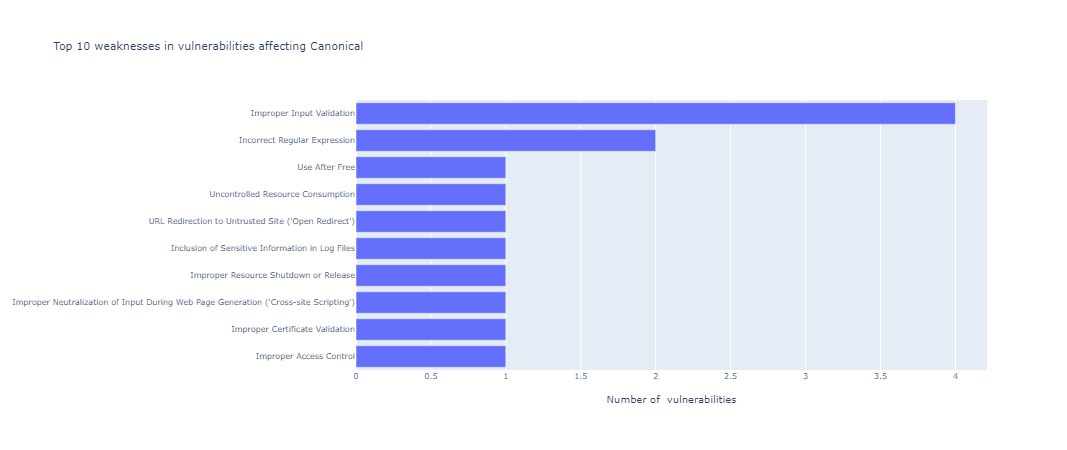

In [12]:
cwe_v = util.get_cwes_by_vendor(vdata, 'Canonical')
y = cwe_v['count']
fig = go.Figure()
fig.add_bar(x=y.values, y=y.index.values, orientation='h')

fig.update_layout(title='Top {0:d} weaknesses in vulnerabilities affecting Canonical'.format(n),
                  xaxis = dict(title='Number of  vulnerabilities'),
                  font=dict(size=8))

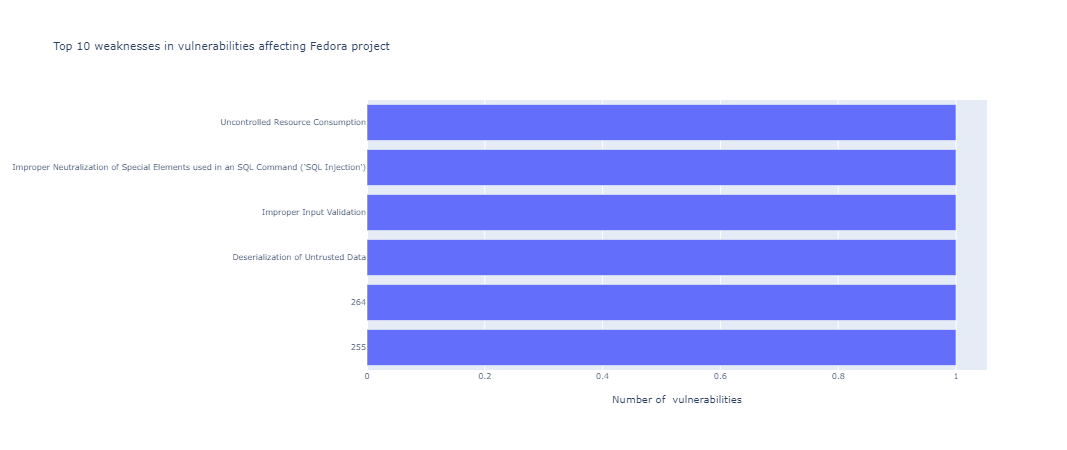

In [13]:
cwe_v = util.get_cwes_by_vendor(vdata, 'Fedoraproject')
y = cwe_v['count']
fig = go.Figure()
fig.add_bar(x=y.values, y=y.index.values, orientation='h')

fig.update_layout(title='Top {0:d} weaknesses in vulnerabilities affecting Fedora project'.format(n),
                  xaxis = dict(title='Number of  vulnerabilities'),
                  font=dict(size=8))

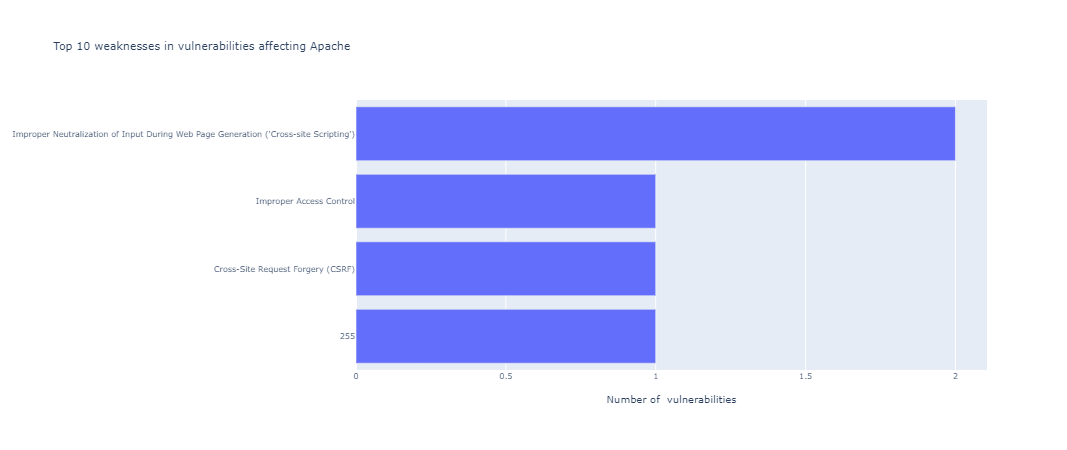

In [14]:
cwe_v = util.get_cwes_by_vendor(vdata, 'Apache')
y = cwe_v['count']
fig = go.Figure()
fig.add_bar(x=y.values, y=y.index.values, orientation='h')

fig.update_layout(title='Top {0:d} weaknesses in vulnerabilities affecting Apache'.format(n),
                  xaxis = dict(title='Number of  vulnerabilities'),
                  font=dict(size=8))

In [15]:
md('## OpenSource projects Top CWEs:\n\
## Improper Restriction of Operations within the Bounds of a Memory Buffer\n\
## Improper Input Validation')

## OpenSource projects Top CWEs:
## Improper Restriction of Operations within the Bounds of a Memory Buffer
## Improper Input Validation

In [16]:
cwe_list=list(top10_cwe.cwe)
cwe_score3=[data.loc[data['cwe'] == i]['cvss3_bscore'].mean() for i in cwe_list]
cwe_score2=[data.loc[data['cwe'] == i]['cvss2_bscore'].mean() for i in cwe_list]

## 3.6. Average CVSSv3 for top 10 CWEs (Python)

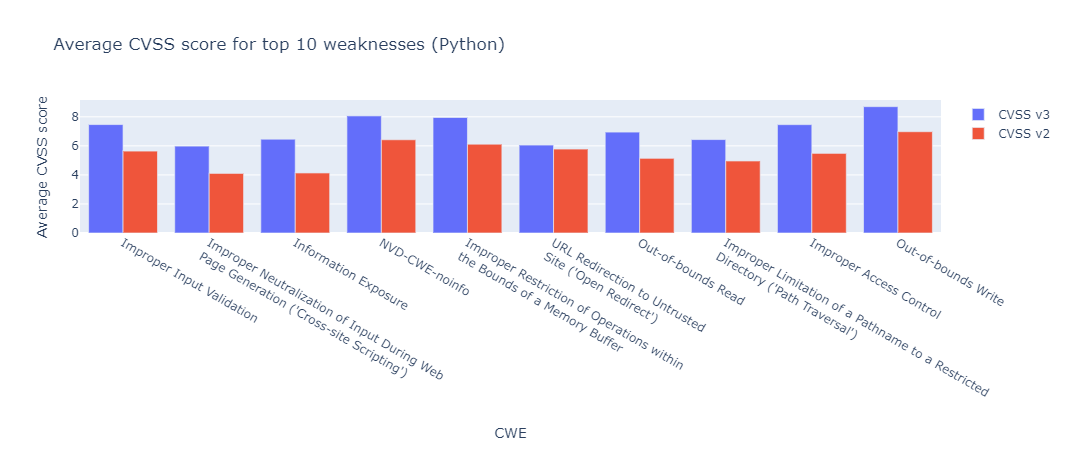

In [26]:
cwe_bscores3 =pd.DataFrame({'cwe': [util.wrap(util.get_name_by_cwe(i)) for i in cwe_list],
               'cvss3_bscore_mean':cwe_score3})
cwe_bscores2 =pd.DataFrame({'cwe': [util.wrap(util.get_name_by_cwe(i)) for i in cwe_list],
               'cvss2_bscore_mean':cwe_score2})

fig = go.Figure()
fig.add_bar(x=cwe_bscores3["cwe"], y=cwe_bscores3['cvss3_bscore_mean'],name='CVSS v3')
fig.add_bar(x=cwe_bscores2["cwe"], y=cwe_bscores2['cvss2_bscore_mean'],name='CVSS v2')

fig.update_layout(title='Average CVSS score for top 10 weaknesses (Python)',
                  xaxis = dict(title='CWE', type='category'),
                  yaxis = dict(title='Average CVSS score'))

## 3.7. Average CVSSv2 for top 10 CWEs

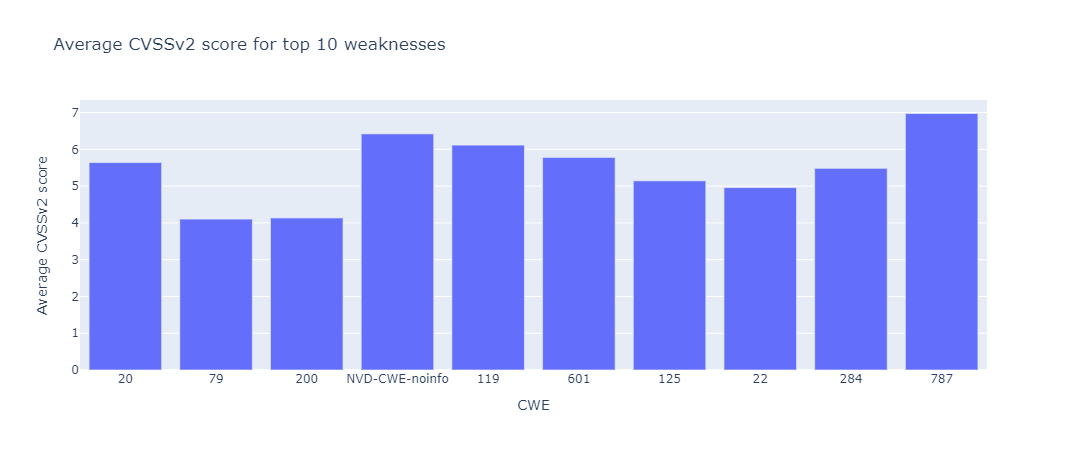

In [18]:
cwe_bscores2 =pd.DataFrame({'cwe': cwe_list,
               'cvss2_bscore_mean':cwe_score2})
 
fig = go.Figure()
fig.add_bar(x=cwe_bscores2["cwe"], y=cwe_bscores2['cvss2_bscore_mean'])
fig.update_layout(title='Average CVSSv2 score for top 10 weaknesses',
                  xaxis = dict(title='CWE', type='category'),
                  yaxis = dict(title='Average CVSSv2 score'))

## 3.8. Top 10 CWEs with high CVSS (Python)

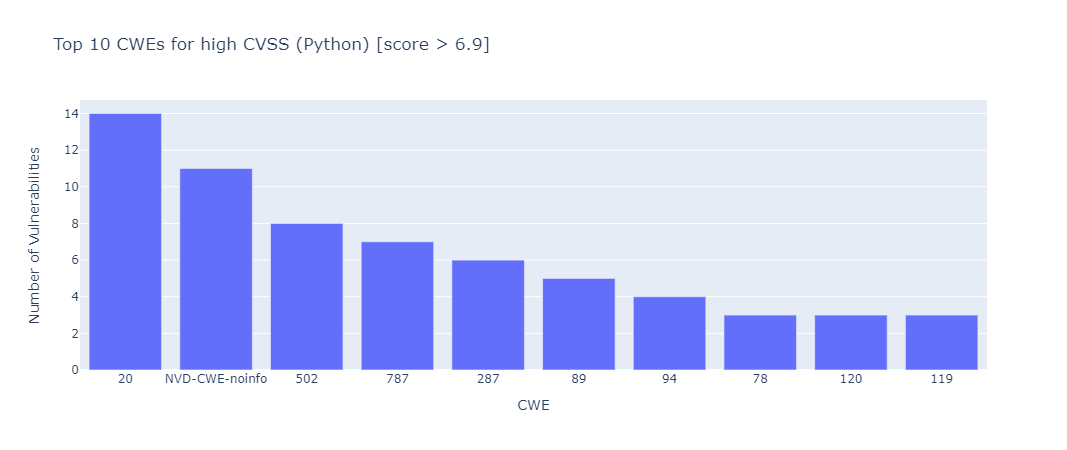

In [27]:
high_cves = data[(data['cvss3_bscore'] > 6.9) & (data['cvss2_bscore'] > 6.9)].sort_values(by=['cvss3_bscore'], ascending = False)[['source_db_id', 'cwe']]
high_cves = high_cves.cwe.groupby(high_cves.cwe).count().sort_values(ascending=False).head(10)
high_cves=high_cves.to_frame()
high_cves.columns=['c']
high_cves.reset_index(level=0, inplace=True)
high_cves.columns=['cwe','c']

fig = go.Figure()
fig.add_bar(x=high_cves['cwe'], y=high_cves['c'])

fig.update_layout(title='Top 10 CWEs for high CVSS (Python) [score > 6.9]',
                  xaxis = dict(title='CWE', type='category'),
                  yaxis = dict(title='Number of Vulnerabilities'))

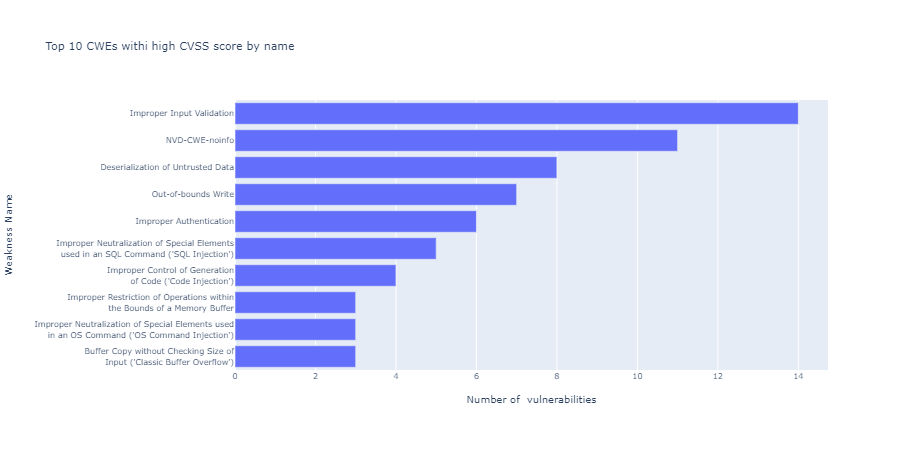

In [20]:
high_cves['Name']=high_cves['cwe'].map(util.get_name_by_cwe)
high_cves['Name']=high_cves['Name'].map(util.wrap)
x = high_cves.groupby('Name')['c'].mean().sort_values().head(10)
fig = go.Figure()
fig.add_bar(x=x.values, y=x.index.values, orientation='h')

fig.update_layout(title='Top 10 CWEs withi high CVSS score by name',
                  xaxis = dict(title='Number of  vulnerabilities'),
                  yaxis = dict(title ='Weakness Name'),
                  font=dict(size=8))

In [21]:
high_cves

,cwe,c,Name
0,20,14,Improper Input Validation
1,NVD-CWE-noinfo,11,NVD-CWE-noinfo
2,502,8,Deserialization of Untrusted Data
3,787,7,Out-of-bounds Write
4,287,6,Improper Authentication
5,89,5,Improper Neutralization of Special Elements<br...
6,94,4,Improper Control of Generation<br>of Code ('Co...
7,78,3,Improper Neutralization of Special Elements us...
8,120,3,Buffer Copy without Checking Size of<br>Input ...
9,119,3,Improper Restriction of Operations within<br>t...
